In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from onix.data_tools import get_experiment_data

In [190]:
#data_numbers = [2785, 2784, 2786, 2787, 2788, 2789, 2791, 2792, 2793, 2794]
#data_numbers = [2787, 2796, 2799]
#data_numbers = [2789, 2792, 2793]
baseline_number = 100658
#data_numbers = [2784, 2818, 2824, 2825]
#data_numbers = [2801, 2827, 2828, 2829, 2830, 2831, 2832]
#data_numbers = [2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850]
data_numbers = [100409, 100410]
data_numbers = [100557, 100558, 100560, 100561, 100562, 100563]
data_numbers = [100557, 100558, 100560, 100565, 100567]
data_numbers = [100588, 100583]
data_numbers = [100603, 100602]
data_numbers = [100608, 100609]
data_numbers = [100611, 100610]
data_numbers = [100663, 100664, 100665, 100666, 100667, 100668]
data = dict([(kk, get_experiment_data(kk)) for kk in data_numbers])
data[baseline_number] = get_experiment_data(baseline_number)
labels = {
    100663: "2x AA battery, ch1",
    100664: "2x AA battery, ch1 / ch2",
    100665: "9V battery, ch1",
    100666: "9V battery, ch1 / ch2",
    100667: "9V battery with 6 dB attenuator (6.3 V reading), ch1",
    100668: "9V battery with 6 dB attenuator (6.3 V reading), ch1 / ch2",
}

ValueError: operands could not be broadcast together with shapes (318,) (518,) 

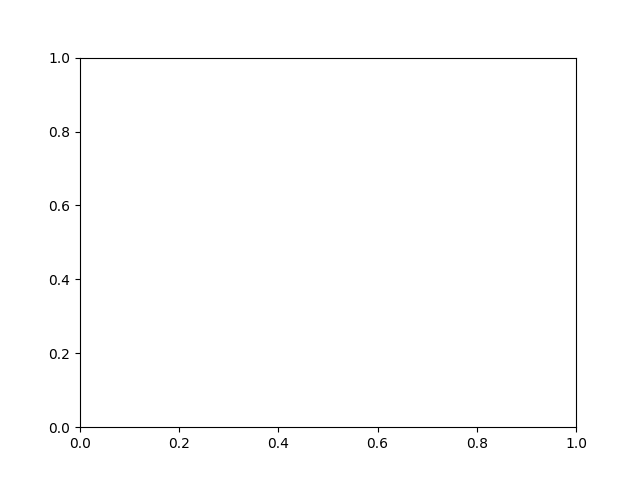

In [191]:
fig, ax = plt.subplots()

for label in [1]:
    for number in data_numbers:
        if number != baseline_number:
            try:
                p = data[number][1]["p_gain"]
                i = data[number][1]["i_time"]
                d = data[number][1]["d_time"]
                state = data[number][1]["pid_state"]
                if state:
                    label_1 = f"p = {p}, i = {i} us, d = {d} us"
                else:
                    label_1 = "pid off"
            except:
                try:
                    label_1 = labels[number]
                except:
                    label_1 = "n/a"
            W_V_no_bg = data[number][0][f"W_V{label}"] - data[baseline_number][0][f"W_V{label}"]
            ax.plot(data[number][0]["f"], np.sqrt(W_V_no_bg) / data[number][0][f"V{label}_avg"], label=f"#{number}: {label_1}", alpha=0.8)
        else:
            pass
            #ax.plot(data[number][0]["f"], np.sqrt(data[number][0][f"W_V{label}"]), label=f"#{number}: baseline", alpha=0.8)

ax.legend()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Relative voltage noise ($\\sqrt{\\mathrm{Hz}}^{-1}$)")
plt.tight_layout()
plt.show()

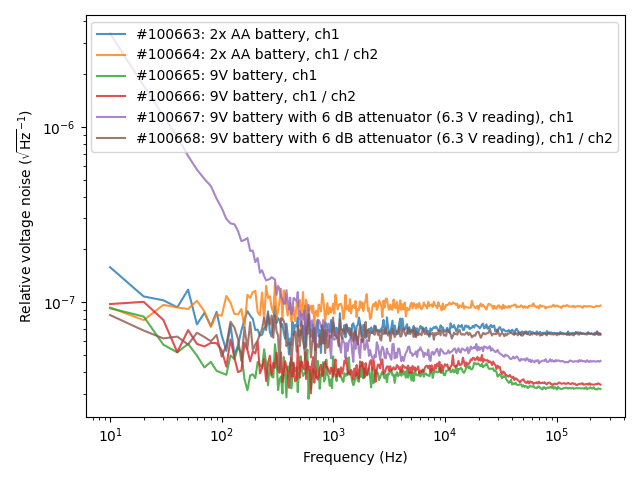

In [192]:
fig, ax = plt.subplots()

for label in [1]:
    for number in data_numbers:
        if number != baseline_number:
            try:
                p = data[number][1]["p_gain"]
                i = data[number][1]["i_time"]
                d = data[number][1]["d_time"]
                state = data[number][1]["pid_state"]
                if state:
                    label_1 = f"p = {p}, i = {i} us, d = {d} us"
                else:
                    label_1 = "pid off"
            except:
                pass
            try:
                label_1 = labels[number]
            except:
                label_1 = "n/a"
            ax.plot(data[number][0]["f"], np.sqrt(data[number][0][f"W_V{label}"]) / data[number][0][f"V{label}_avg"], label=f"#{number}: {label_1}", alpha=0.8)
        else:
            pass
            #ax.plot(data[number][0]["f"], np.sqrt(data[number][0][f"W_V{label}"]), label=f"#{number}: {labels[number]}", alpha=0.8)

ax.legend()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Relative voltage noise ($\\sqrt{\\mathrm{Hz}}^{-1}$)")
plt.tight_layout()
plt.show()

In [208]:
temp = np.sqrt(data[number][0][f"W_V{label}"]) / data[number][0][f"V{label}_avg"]
sum = 0
for kk in range(len(data[number][0]["f"]) - 1):
    f_size = data[number][0]["f"][kk + 1] - data[number][0]["f"][kk]
    if data[number][0]["f"][kk] < 1e3:
        sum += ((temp[kk] + temp[kk + 1]) / 2) ** 2 * (data[number][0]["f"][kk] / 1e3) ** 2
    elif data[number][0]["f"][kk] < 100e3 and data[number][0]["f"][kk] > 1e3:
        sum += ((temp[kk] + temp[kk + 1]) / 2) ** 2 * f_size
    elif data[number][0]["f"][kk] < 10e6 and data[number][0]["f"][kk] > 100e3:
        sum += ((temp[kk] + temp[kk + 1]) / 2) ** 2 * (100e3 / data[number][0]["f"][kk]) ** 2
print(np.sqrt(sum))

0.0005427593473385582


In [202]:
4e-4 / np.sqrt(100e3)

1.2649110640673517e-06